<a href="https://colab.research.google.com/github/gang-bi/rep_1/blob/main/chapter02_mathematical_building_blocks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# mnist에 데이터 업로드

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_images.shape
# 학습 이미지 데이터셋(train_image)의 차원: (60000, 28, 28) = 이미지 60000개, 28x28 픽셀

(60000, 28, 28)

In [6]:
len(train_labels)
# 학습 이미지 데이터셋에 포함된 데이터의 총 개수: 60000

60000

In [7]:
train_labels
# 학습 데이터셋의 레이블 배열을 출력

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape
# 테스트 이미지 데이터셋(test_images)의 차원: (10000, 28, 28) = 이미지 10000개, 28x28 픽셀

(10000, 28, 28)

In [9]:
len(test_labels)
# 테스트 이미지 데이터셋에 포함된 데이터의 총 개수: 10000

10000

In [10]:
test_labels
# 테스트 데이터셋의 레이블 배열을 출력

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step: 모델 구축 단계**

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
# 차원 변경: 2차원(28x28) -> 1차원(28*28=784)
train_images = train_images.astype("float32") / 255
# 데이터 타입을 "foat32"로 변경
# 모든 픽셀 값이 0~1이 되도록 정규화: 원본 MNIST 데이터셋의 픽셀 값은 0부터 255까지의 정수값을 가지기 때문에 225로 나눠 0~1 사이의 값을 갖도록 함.
test_images = test_images.reshape((10000, 28 * 28))
# 차원 변경: 2차원(28x28) -> 1차원(28*28=784)
test_images = test_images.astype("float32") / 255
# 데이터 타입을 "foat32"로 변경
# 모든 픽셀 값이 0~1이 되도록 정규화: 원본 MNIST 데이터셋의 픽셀 값은 0부터 255까지의 정수값을 가지기 때문에 225로 나눠 0~1 사이의 값을 갖도록 함.

**"Fitting" the model**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# epoch=5: 전체 학습 과정은 5회 반복
# batch_size=128: 한 번에 네트워크에 전달되는 데이터의 사이즈가 128
# model.fit: 모델의 학습 과정을 실행시키며, 설정된 epoch 수와 배치 사이즈에 따라 최적화된 모델의 가중치를 업데이트

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2613 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1057 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0506 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0376 - accuracy: 0.9888


**Using the model to make predictions**

In [15]:
test_digits = test_images[0:10]
# 배열에서 처음 10개의 이미지를 선택하여 test_digits 변수에 저장
predictions = model.predict(test_digits)
# model.predict 메서드를 사용하여 test_digits에 대한 예측을 수행 후 각 클래스에 대한 예측 확률을 배열로 반환
# 즉, 0부터 10까지의 각 이미지가 어떤 숫자와 가장 가까운지를 반영한 확률을 계산하고, 이를 배열로 반환하여 저장.
predictions[0]
# 0~10번째 이미지들 중 0번째 이미지에 대한 예측 결과를 담은 배열로, 10개 클래스 각각에 속할 확률을 나타냄.

1/1 [==============================] - 0s 138ms/step


array([9.4573593e-08, 4.5657216e-09, 6.6513685e-06, 1.8375907e-04,
       4.9889492e-11, 2.7879913e-08, 2.3684098e-11, 9.9980330e-01,
       5.5638534e-08, 6.0346183e-06], dtype=float32)

In [16]:
predictions[0].argmax()
# 0번째 이미지들 중 가장 높은 예측 확률을 가지는 값을 반환: 7

7

In [17]:
predictions[0][7]
# 0번째 이미지의 7번째 배열을 조회: 0번째 이미지가 숫자'7'일 확률을 알 수 있음

0.9998033

In [18]:
test_labels[0]
# 0번째 이미지의 예측에 대한 정답

7

**Evaluating the model on new data**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# 모델의 손실값, 모델의 정확도 = 모델 평가(테스트 데이터, 정답 데이터)
print(f"test_acc: {test_acc}")
# 파이썬의 f-string을 사용하여, test_acc 변수에 저장된 테스트 정확도를 문자열로 포맷하여 출력: accuracy: 0.98 -> 98%의 정확도로 예측

313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9807
test_acc: 0.9807000160217285


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [20]:
import numpy as np
x = np.array(12)
# 12라는 스칼라 값을 갖는 NumPy 0차원 배열 생성
x

array(12)

In [21]:
x.ndim
# x의 차원

0

### Vectors (rank-1 tensors)

In [22]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim
# 벡터가 1개 있으므로, 1차원

1

### Matrices (rank-2 tensors)

In [27]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
# 3행 5열의 데이터
x.ndim
# 따라서 2차원 데이터

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
# 3행 5열의 데이터가 3개 있는 형태
x.ndim
# 따라서 3차원

### Key attributes

In [28]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
train_images.ndim
# (60000, 28, 28)이므로 3차원

3

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype
# dtype('unit8'): 8바이트

dtype('uint8')

**Displaying the fourth digit**

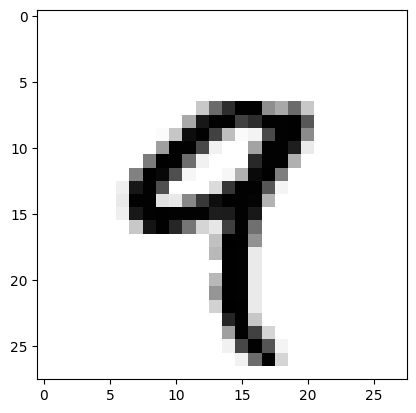

In [33]:
import matplotlib.pyplot as plt
digit = train_images[4]
# train_images 배열에서 5번째 이미지(인덱스 4)를 선택하여 digit 변수에 저장
plt.imshow(digit, cmap=plt.cm.binary)
# plt.imshow: 함수는 이미지 데이터를 그래픽으로 표시, digit: 표시할 이미지 데이터, cmap=plt.cm.binary: color map을 이진으로 설정 -> 이미지가 흑백으로 표현
plt.show()
# plt.imshow 함수를 사용해 준비된 이미지를 화면에 표시

In [34]:
train_labels[4]
# 5번째 이미지의 정답: 9

9

### Manipulating tensors in NumPy

In [35]:
my_slice = train_images[10:100]
# train_image에 있는 이미지들 중 11~100번째 이미지를 선택하여 my_slice에 저장
my_slice.shape
# (90, 28, 28) = (개수, 픽셀 축, 픽셀 축)

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, :, :]
# train_image에 있는 이미지들 중 11~100번째 이미지를 선택하되, 선택된 각 이미지의 모든 행(:)과 열(:)을 포함함.
# *위 코드와 결과는 같지만 조금 더 명시적인 코드임*
my_slice.shape
# (90, 28, 28) = (개수, 픽셀 축, 픽셀 축)

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, 0:28, 0:28]
# train_image에 있는 이미지들 중 11~100번째 이미지를 선택, 행과 열 모두 0~27번째 값을 포함
my_slice.shape

(90, 28, 28)

In [41]:
my_slice = train_images[:, 14:, 14:]
# train_image에 있는 모든 이미지들을 선택, 행과 열 모두 14~끝까지 있는 값을 포함
my_slice.shape

(60000, 14, 14)

In [43]:
my_slice = train_images[:, 7:-7, 7:-7]
# train_image에 있는 모든 이미지들을 선택, 행과 열 모두 처음 7번째 값 ~ 끝에서 7번째 값(21번째 값)을 선택
my_slice.shape

(60000, 14, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

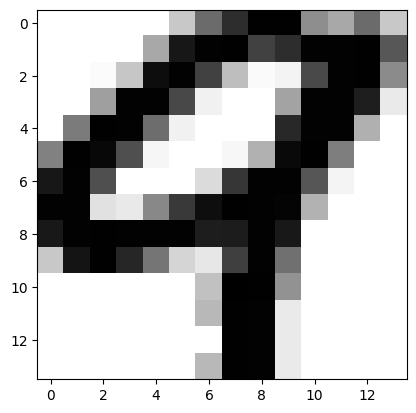

In [44]:
plt.imshow(my_slice[4], cmap=plt.cm.binary)
# 14x14 이미지 출력
plt.show

### The notion of data batches

In [45]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary